# Stock Market Analysis and Prediction: Leveraging Data Science for Insights

### Table of Contents

By following this roadmap, readers can gain a comprehensive understanding of the stock market, learn how to leverage Data Science for financial analysis, and optimize investment strategies for maximum returns. Let's get started!
1. [Introduction](#1-introduction)
2. [Data Collection and Preprocessing](#2-data-collection-and-preprocessing)
   - [Key Libraries](#key-libraries)
   - [Stock Data Retrieval with APIs](#stock-data-retrieval-with-apis)
   - [Data Cleaning and Formatting](#data-cleaning-and-formatting)
   - [Feature Engineering for Machine Learning](#feature-engineering-for-machine-learning)
   - [Selected Features for Stock Price Analysis](#selected-features-for-stock-price-analysis)
3. [Exploratory Data Analysis (EDA)](#3-exploratory-data-analysis-eda)
   - [Statistical Summaries](#statistical-summaries)
   - [Visualizing Trends](#visualizing-trends)
4. [Financial Metrics](#4-financial-metrics)
   - [Performance Metrics](#performance-metrics)
   - [Risk and Volatility Analysis](#risk-and-volatility-analysis)
5. [Machine Learning Applications](#5-machine-learning-applications)
   - [Predictive Modeling](#predictive-modeling)
   - [Classification Tasks](#classification-tasks)
   - [Clustering Analysis](#clustering-analysis)
6. [Portfolio Optimization](#6-portfolio-optimization)
   - [Markowitz Mean-Variance Optimization](#markowitz-mean-variance-optimization)
   - [Black-Litterman Allocation](#black-litterman-allocation)
   - [Reinforcement Learning Approaches](#reinforcement-learning-approaches)
7. [Backtesting Investment Strategies](#7-backtesting-investment-strategies)
8. [Insights and Conclusions](#8-insights-and-conclusions)
9. [Future Work](#9-future-work)



## Introduction
____


The stock market presents a complex and dynamic environment. Investors face numerous challenges, including identifying profitable opportunities, managing risk, and optimizing portfolio allocation. This project focuses on analyzing stock data for four prominent technology companies: Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN). These companies were selected for their market leadership, innovation, and global influence.

**Objective:**

- Analyze historical stock data to identify patterns and trends.

- Use machine learning models to predict stock prices and classify stock movements.

- Evaluate investment strategies through portfolio optimization and backtesting.

Problem Statement:

- Identifying profitable investment opportunities.

- Managing risk effectively.

- Optimizing asset allocation.


## Data Collection and Preprocessing
____

### Key Libraries

The success of this project hinges on leveraging powerful Python libraries that enable financial analysis, portfolio optimization, and technical analysis. These libraries form the backbone of the notebook, facilitating data retrieval, manipulation, visualization, and modeling. Below is an overview of the key libraries used and their specific contributions to the project:


- **`yfinance`** 
  A popular library that provides access to historical stock price data, financial statements, and other key metrics for a wide range of stocks. It is a valuable resource for extracting stock data directly from Yahoo Finance for analysis.

- **`Quantstats`** 
  This library specializes in quantitative finance, offering tools for analyzing investment strategies, backtesting, and evaluating portfolio performance. It provides a comprehensive suite of functions for detailed financial analysis and visualization of key metrics


- **`PyPortfolioOpt`**
  This library focuses on portfolio optimization, enabling users to construct optimal portfolios based on various criteria such as risk, return, and constraints. It is a powerful tool for optimizing investment strategies, including mean-variance optimization and Black-Litterman models.

- **`TA-Lib`** 
  A Technical Analysis Library (TA-Lib) offers a wide range of technical indicators for analyzing stock price data. It includes functions for calculating moving averages, RSI, MACD, Bollinger Bands, and other commonly used technical indicators.

- **`Plotly`**
  This library offers interactive visualization capabilities, allowing users to create dynamic and engaging plots for exploring stock data. It provides tools for creating interactive charts, dashboards, and visualizations.

Other commonly used libraries: 

- **`Pandas`**
  This library is essential for data manipulation and analysis, allowing us to handle and preprocess stock data efficiently. It provides powerful data structures and functions for cleaning, transforming, and analyzing financial data.

- **`Numpy`**
  A fundamental library for numerical computing, Numpy provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

- **`Matplotlib and Seaborn`**
  This combination of libraries is used for data visualization, enabling the creation of informative plots, charts, and graphs to visualize trends, patterns, and relationships in the stock data.

- **`Scikit-Learn`**
  A machine learning library that provides a wide range of tools for building predictive models, evaluating performance, and optimizing parameters. It includes functions for regression, classification, clustering, and model evaluation.

By combining these libraries with Python's robust data science capabilities, we can unlock the full potential of financial analysis and stock market prediction. The subsequent sections will delve into the process of collecting, preprocessing, and analyzing stock data to derive actionable insights for investors.

In [2]:
# Data Handling and Statistical Analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats
import skimpy as sp
pd.set_option('display.max_columns', None)


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive visualization libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)  # Enable Plotly offline


# Financial Data and Analysis
import ta
import talib
import quantstats as qs
import yfinance as yf
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
from pypfopt import black_litterman, BlackLittermanModel



# Machine Learning and Optimization
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.linear_model import SGDClassifier

### Data Retrieval with APIs

To initiate our analysis, we will retrieve historical stock price, and returns data for four prominent technology companies: 

- Apple: aapl

- Microsoft: msft

- Google (Alphabet): googl

- Amazon: amzn

We will utilize the `Quantstats` (qs) and `yfinance` (yf) libraries to retrieve data from Yahoo Finance. The data will cover the period from January 1, 2010, to December 31, 2021, providing over a decade of historical stock performance for analysis. The data will include daily stock prices, trading volume, and other relevant metrics that will serve as the foundation for our analysis. 

These companies were selected due to their significant market capitalization, technological innovation, and widespread global influence, making them representative of the technology sector and attractive for investment analysis.  The data will include daily stock prices, trading volume, and other relevant metrics that will serve as the foundation for our analysis. Let's begin by importing the necessary  stock data.


In [3]:
# Define the time window and stock tickers
start = '2010-01-01'
end = '2021-12-31'
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

# Loop through tickers to download and save data
for ticker in tickers:
    # Download historical prices
    data = yf.download(ticker, start=start, end=end)
    data.to_csv(f'{ticker.lower()}_price.csv')

    # Download returns
    returns = qs.utils.download_returns(ticker).loc[start:end]
    returns.to_csv(f'{ticker.lower()}_returns.csv')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Loading the Stock Returns
aapl_returns = pd.read_csv('aapl_returns.csv', index_col=0, parse_dates=True) 
msft_returns = pd.read_csv('msft_returns.csv', index_col=0, parse_dates=True) 
googl_returns = pd.read_csv('googl_returns.csv', index_col=0, parse_dates=True) 
amzn_returns = pd.read_csv('amzn_returns.csv', index_col=0, parse_dates=True) 

In [5]:
# Loading the Stock historical prices:
aapl_price = pd.read_csv('aapl_price.csv', index_col=0, parse_dates=True) 
msft_price = pd.read_csv('msft_price.csv', index_col=0, parse_dates=True) 
googl_price = pd.read_csv('googl_price.csv', index_col=0, parse_dates=True) 
amzn_price = pd.read_csv('amzn_price.csv', index_col=0, parse_dates=True) 

In [6]:
# Display the first 5 rows of the Stock Returns
aapl_returns.head()

,AAPL
Date,
2010-01-04 00:00:00+00:00,0.015565
2010-01-05 00:00:00+00:00,0.001729
2010-01-06 00:00:00+00:00,-0.015906
2010-01-07 00:00:00+00:00,-0.001849
2010-01-08 00:00:00+00:00,0.006648


In [7]:
# Display the first 5 rows of the Stock Prices
aapl_price.head()

,Adj Close,Close,High,Low,Open,Volume
Price,,,,,,
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04 00:00:00+00:00,6.447412967681885,7.643214225769043,7.660714149475098,7.585000038146973,7.622499942779541,493729600
2010-01-05 00:00:00+00:00,6.458559513092041,7.656428813934326,7.699643135070801,7.6160712242126465,7.664286136627197,601904800
2010-01-06 00:00:00+00:00,6.355827808380127,7.534643173217773,7.68678617477417,7.526785850524902,7.656428813934326,552160000


### Data Cleaning and Formatting

The focus of this section is to clean and format the stock data to ensure consistency, accuracy, and compatibility with the subsequent analysis. This process involves handling missing values, standardizing column headers, and converting data types to facilitate further analysis. The cleaned data will be stored in a Pandas DataFrame for easy manipulation and exploration.

* Data Cleaning:

* Removed missing values.

* Converted timezone-aware timestamps to naive format.

* Standardized column headers and data types.

**STOCK RETURNS DATA CLEANING**

When working with financial data, it's crucial to be aware of timezones. As our data contains stock retutns, and dates are in UTC timezone, we will specifically converts the `timezone-aware DatetimeIndex` to a `timezone-naive DatetimeIndex`.    

A timezone-naive DatetimeIndex does not have any timezone information associated with it. This conversion is essential for consistency and compatibility with various financial analysis tools and libraries.

Thereafter, the columns will be rename to ensure consistency and clarity. The final step involves converting the data types to facilitate further analysis and visualization. The cleaned data will be stored in a Pandas DataFrame for easy manipulation and exploration.

In [8]:
# converting time zone to none
aapl_returns.index = aapl_returns.index.tz_convert(None)
msft_returns.index = msft_returns.index.tz_convert(None)
googl_returns.index = googl_returns.index.tz_convert(None)
amzn_returns.index = amzn_returns.index.tz_convert(None)

In [9]:
# Rename the columns
aapl_returns.columns = ['returns'] 
msft_returns.columns = ['returns']
googl_returns.columns = ['returns']
amzn_returns.columns = ['returns']

In [10]:
# Display the first few rows of the appl_data
aapl_returns.head()

,returns
Date,
2010-01-04,0.015565
2010-01-05,0.001729
2010-01-06,-0.015906
2010-01-07,-0.001849
2010-01-08,0.006648


We now have a daily return data for the four stocks, We can now plot the daily returns chart for each of them using `Quantstats`.

To have a broad view of the stock returns, the  daily returns will be benchmarked against the `S&P 500 index`. This will provide a comparison of the stock returns against the broader market performance. The S&P 500 index is a widely used benchmark for the US stock market, representing the performance of 500 large-cap companies listed on US exchanges. By comparing the stock returns to the S&P 500 index, we can assess the relative performance of the selected stocks and evaluate their risk-adjusted returns.

The S&P 500 index is commonly represented by the symbol `^GSPC` in financial data platforms like Yahoo Finance and other tools that use similar conventions. We will retrieve the historical price data for the S&P 500 index and calculate the daily returns for benchmarking purposes. The data will cover the same period as the stock data, from January 1, 2010, to December 31, 2021.




Apple Daily Returns Plot:



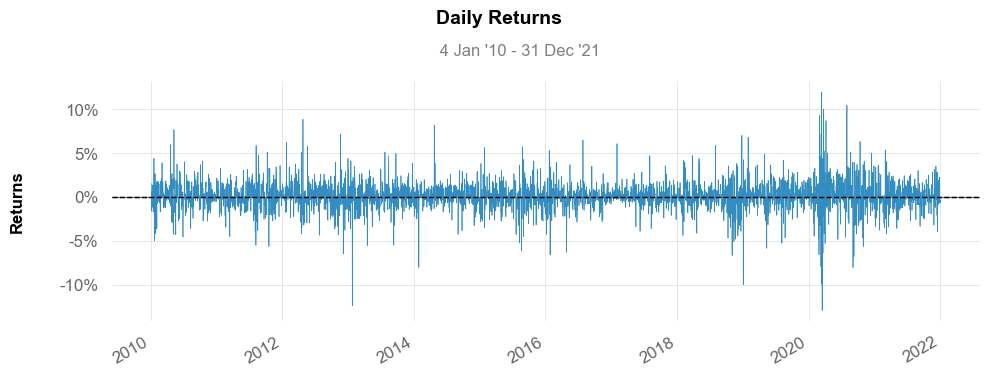




Microsoft Daily Returns Plot:



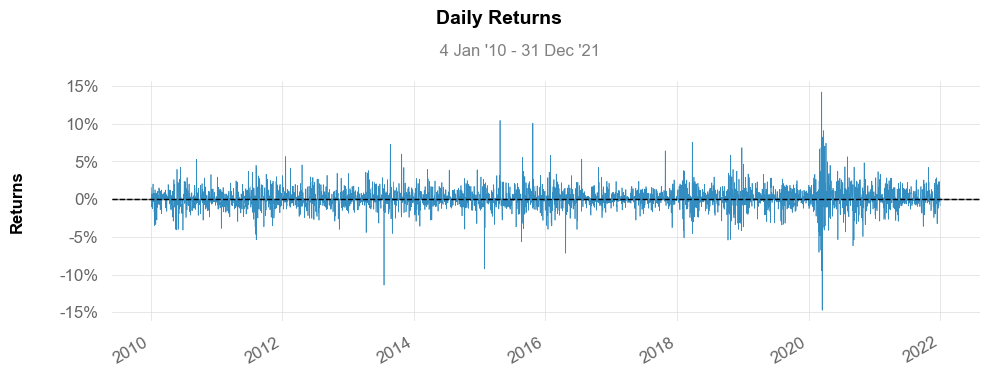




Google Daily Returns Plot:



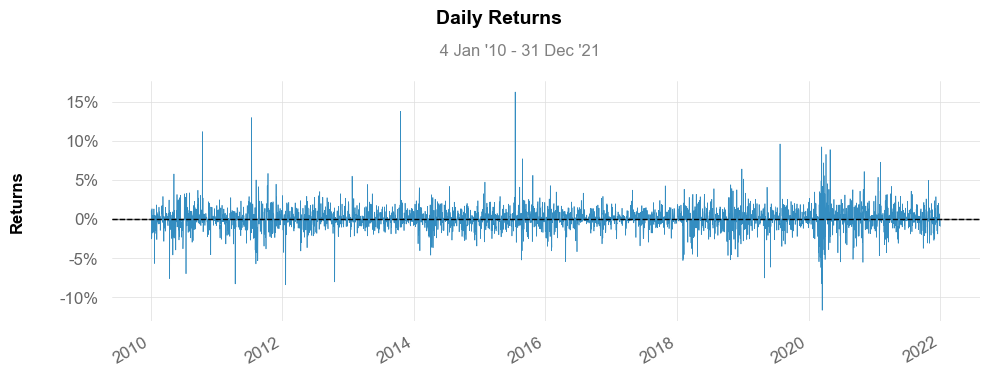




Amazon Daily Returns Plot:



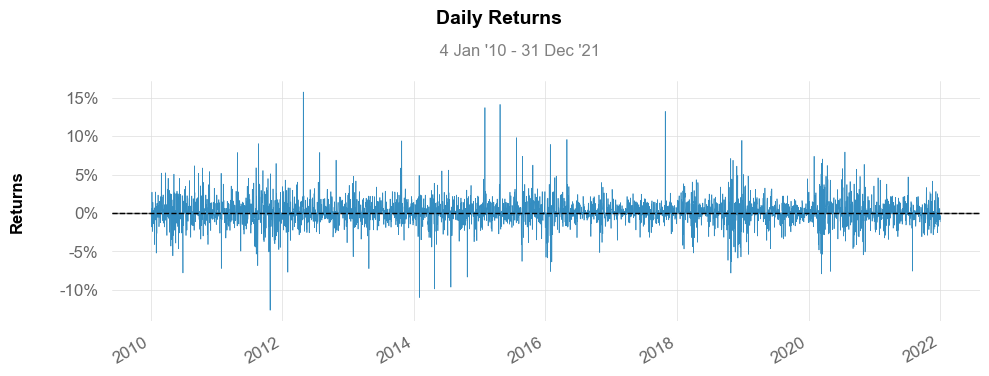

In [11]:
# Plotting Daily Returns for each stock
print('\n')
print('\nApple Daily Returns Plot:\n')
qs.plots.daily_returns(aapl_returns, benchmark='^GSPC') # Using S&P 500 as benchmark
print('\n')


print('\nMicrosoft Daily Returns Plot:\n')
qs.plots.daily_returns(msft_returns, benchmark='^GSPC') # Using S&P 500 as benchmark
print('\n')


print('\nGoogle Daily Returns Plot:\n')
qs.plots.daily_returns(googl_returns, benchmark='^GSPC') # Using S&P 500 as benchmark
print('\n')


print('\nAmazon Daily Returns Plot:\n')
qs.plots.daily_returns(amzn_returns, benchmark='^GSPC') # Using S&P 500 as benchmark
print('\n')

The plot above provide a visual representation of the daily returns for the four selected stocks (Apple, Microsoft, Google, Amazon) and the S&P 500 index. The chart illustrates the volatility and performance of each stock relative to the broader market. By comparing the stock returns to the S&P 500 index, we can identify periods of outperformance or underperformance and assess the risk-adjusted returns of the stocks.

Apple (AAPL) and Amazon (AMZN) exhibit higher volatility compared to Microsoft (MSFT) and Google (GOOGL), with more pronounced fluctuations in daily returns. The S&P 500 index serves as a benchmark for evaluating the relative performance of the stocks, providing a reference point for assessing risk-adjusted returns. The chart highlights the dynamic nature of stock returns and the importance of monitoring performance relative to the broader market.

### Cumulative Returns

To gain further insights into the stock performance, we will calculate the cumulative returns for each stock and the S&P 500 index. The cumulative returns represent the total return on investment over a specified period, taking into account both price appreciation and dividends. By analyzing the cumulative returns, we can assess the long-term performance of the stocks and compare them to the broader market index.




Apple Cumulative Returns Plot



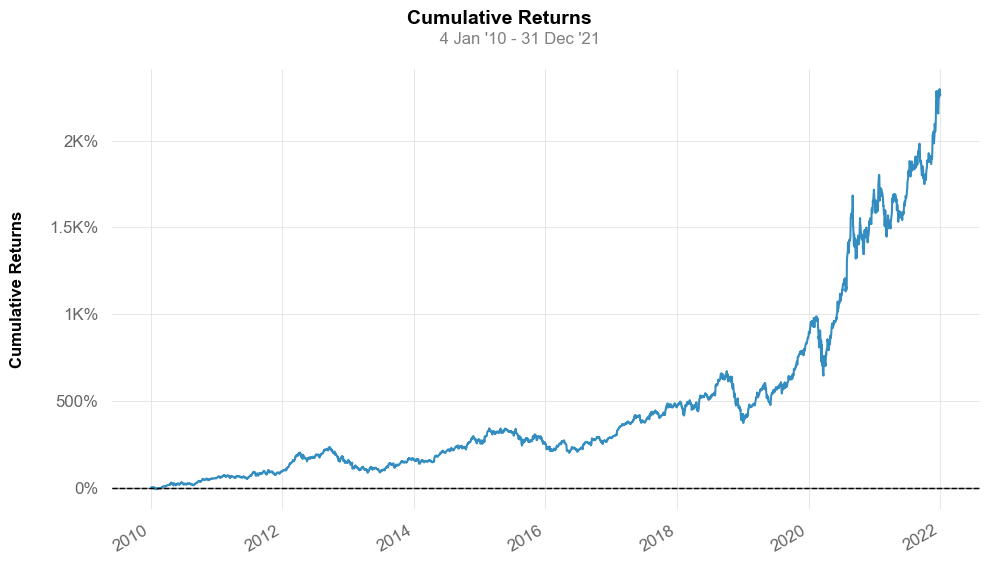






Microsoft Inc. Cumulative Returns Plot



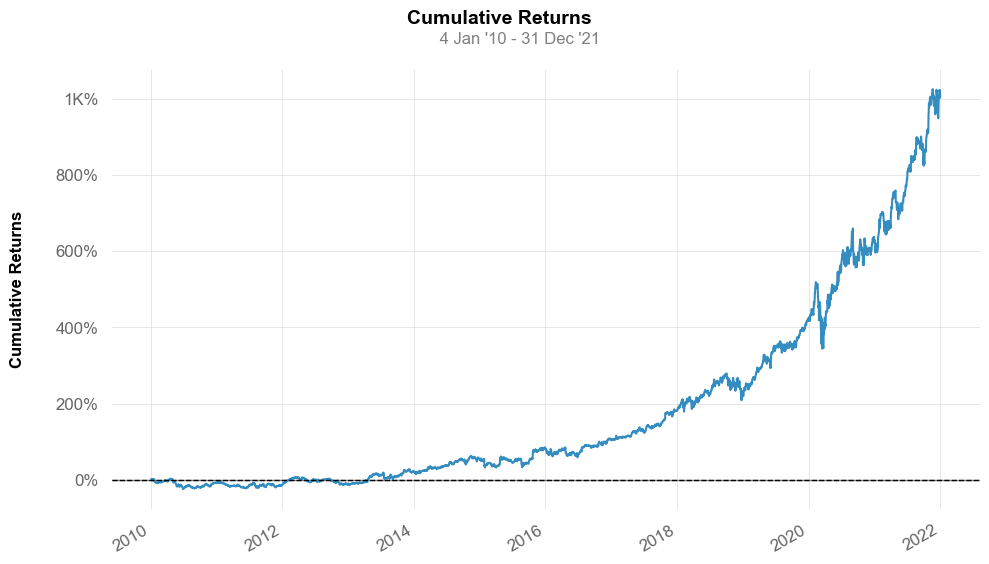






The Google Cumulative Returns Plot



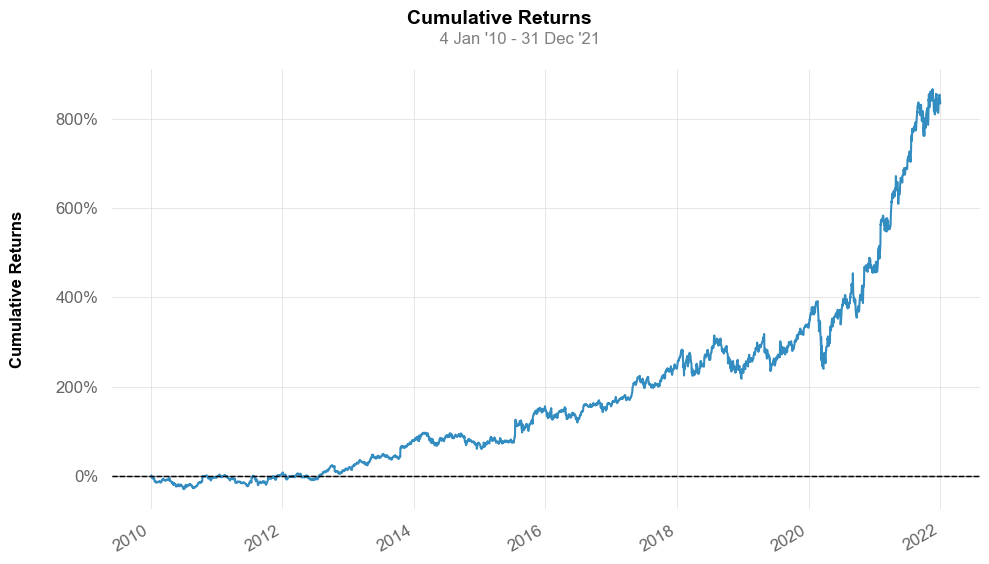






Amazon Cumulative Returns Plot



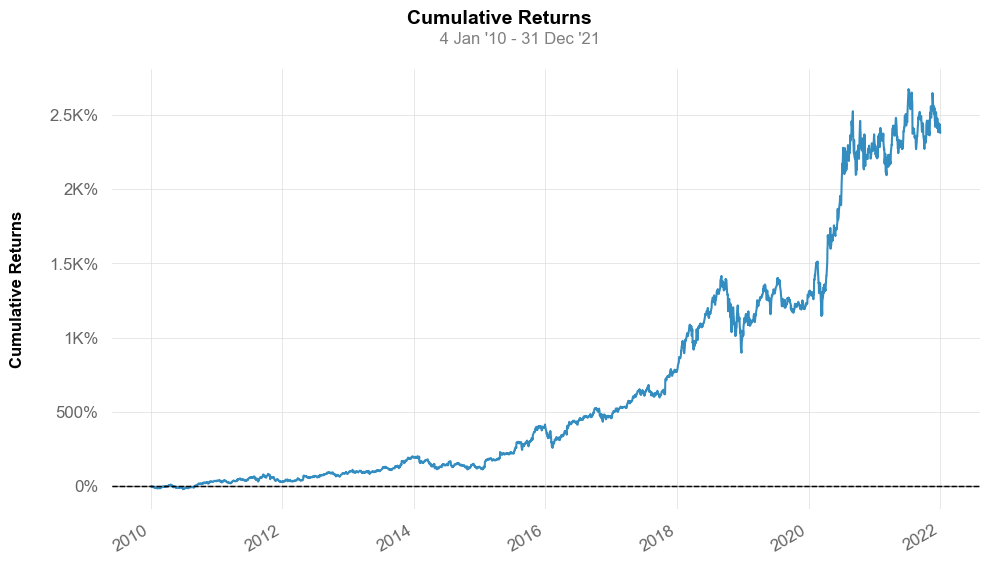

In [12]:
# Plotting Cumulative Returns for each stock
print('\n')
print('\nApple Cumulative Returns Plot\n')
qs.plots.returns(aapl_returns)
print('\n')
print('\n')
print('\nMicrosoft Inc. Cumulative Returns Plot\n')
qs.plots.returns(msft_returns)
print('\n')
print('\n')
print('\nThe Google Cumulative Returns Plot\n')
qs.plots.returns(googl_returns)
print('\n')
print('\n')
print('\nAmazon Cumulative Returns Plot\n')
qs.plots.returns(amzn_returns)

The chart above shows a comparison of the cumulative returns for the four selected stocks (Apple, Microsoft, Google, Amazon) and the S&P 500 index. The cumulative returns provide a comprehensive view of the long-term performance of each stock, capturing the total return on investment over the specified period. By analyzing the cumulative returns, we can identify trends, patterns, and relative performance among the stocks.

### Histogram of Daily Returns

The histogram of daily returns provides insights into the distribution of returns for each stock and the S&P 500 index. By visualizing the frequency and magnitude of daily returns, we can assess the volatility, risk, and performance characteristics of the stocks. The histogram highlights the distribution of returns, including the mean, standard deviation, and skewness of the returns.




Apple Daily Returns Histogram


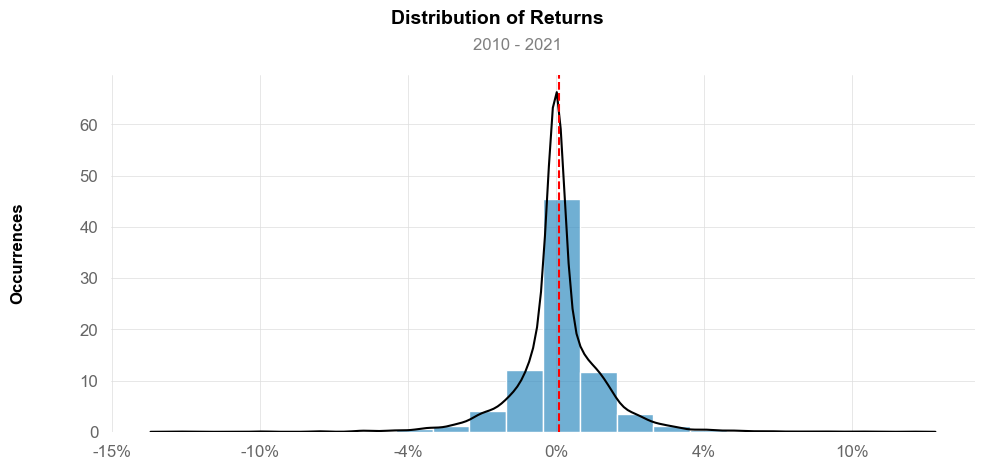






Microsoft Daily Returns Histogram


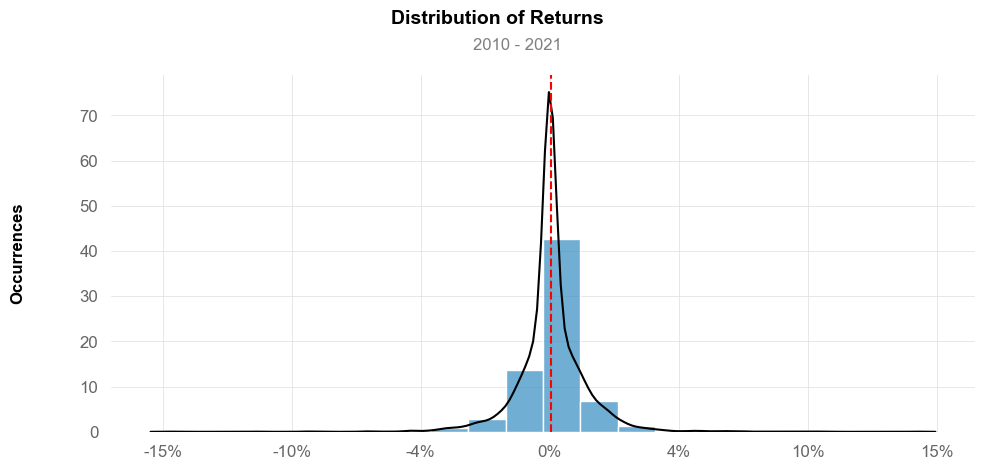






Google Daily Returns Histogram


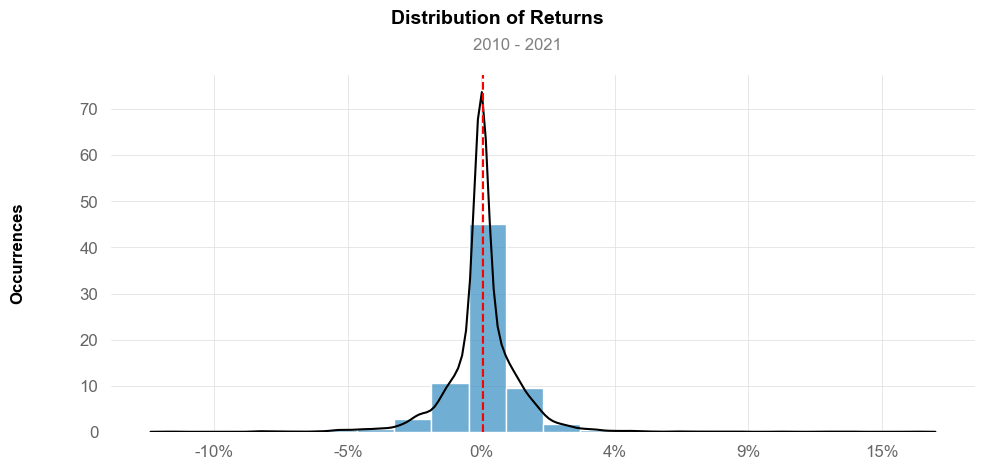

**STOCK PRICES DATA CLEANING**

The stock prices data will be cleaned and standardized to ensure consistency and compatibility for analysis. The cleaning steps include:

- Drop Redundant Data: Remove the Adj Close column.

- Index Management: Reset the index for uniformity.

- Standardize Column Headers: Convert all column names to lowercase.

- Handle Missing Data: Drop rows with missing values and exclude the first row.

- Rename Columns: Rename the first column to date.

- Date Formatting: Convert the date column to datetime format.

- Ensure Consistent Data Types: Convert all data columns to float.

- Set Index: Set the date column as the DataFrame index.

- Time Zone Adjustment: Remove any time zone information from the data.

- The cleaned data will be stored in a Pandas DataFrame, ready for seamless manipulation and exploration.


In [82]:
# Drop Redundant Data: Remove the Adj Close column.
aapl_price = aapl_price.drop(['Adj Close'], axis=1)
msft_price = msft_price.drop(['Adj Close'], axis=1)
googl_price = googl_price.drop(['Adj Close'], axis=1)
amzn_price = amzn_price.drop(['Adj Close'], axis=1)

In [83]:
# Index Management: Reset the index for uniformity.
aapl_price.reset_index(inplace=True)
msft_price.reset_index(inplace=True)
googl_price.reset_index(inplace=True)
amzn_price.reset_index(inplace=True)

In [84]:
# convert the columns headers to lower case
def clean_columns_headers(df):
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')
    
    return df

# Clean the columns headers
aapl_price = clean_columns_headers(aapl_price)
msft_price = clean_columns_headers(msft_price)
googl_price = clean_columns_headers(googl_price)
amzn_price = clean_columns_headers(amzn_price)

In [85]:
# drop rows with missing values, and drop the first row
def drop_rows(df):
    df.dropna(inplace=True)
    df.drop(index=0, inplace=True)
    return df

aapl_price = drop_rows(aapl_price)
msft_price = drop_rows(msft_price)
googl_price = drop_rows(googl_price)
amzn_price = drop_rows(amzn_price)

In [86]:
# Rename the first column to 'date'
aapl_price.rename(columns={'price':'date'}, inplace=True)
msft_price.rename(columns={'price':'date'}, inplace=True)
googl_price.rename(columns={'price':'date'}, inplace=True)
amzn_price.rename(columns={'price':'date'}, inplace=True)

In [87]:
# view the data to check the changes
aapl_price.head()

,date,close,high,low,open,volume
2,2010-01-04 00:00:00+00:00,7.643214225769043,7.660714149475098,7.585000038146973,7.622499942779541,493729600
3,2010-01-05 00:00:00+00:00,7.656428813934326,7.699643135070801,7.6160712242126465,7.664286136627197,601904800
4,2010-01-06 00:00:00+00:00,7.534643173217773,7.68678617477417,7.526785850524902,7.656428813934326,552160000
5,2010-01-07 00:00:00+00:00,7.520713806152344,7.5714287757873535,7.466071128845215,7.5625,477131200
6,2010-01-08 00:00:00+00:00,7.570713996887207,7.5714287757873535,7.466429233551025,7.510714054107666,447610800


In [88]:
# convert the data types of the columns to float
def convert_data_types(df):
    df['open'] = df['open'].astype(float)
    df['high'] = df['high'].astype(float)
    df['low'] = df['low'].astype(float)
    df['close'] = df['close'].astype(float)
    df['volume'] = df['volume'].astype(float)
    df['date'] = pd.to_datetime(df['date'])
    return df


# convert the data types of the columns to float
aapl_price = convert_data_types(aapl_price)
msft_price = convert_data_types(msft_price)
googl_price = convert_data_types(googl_price)
amzn_price = convert_data_types(amzn_price)

In [89]:
# Setting the date as the index
aapl_price.set_index('date', inplace=True)
msft_price.set_index('date', inplace=True)
googl_price.set_index('date', inplace=True)
amzn_price.set_index('date', inplace=True)

In [90]:
# convert the time zone to none
aapl_price.index = aapl_price.index.tz_convert(None)
msft_price.index = msft_price.index.tz_convert(None)
googl_price.index = googl_price.index.tz_convert(None)
amzn_price.index = amzn_price.index.tz_convert(None)

In [91]:
# view the data to check the changes
aapl_price.head()

,close,high,low,open,volume
date,,,,,
2010-01-04,7.643214,7.660714,7.585000,7.622500,493729600.0
2010-01-05,7.656429,7.699643,7.616071,7.664286,601904800.0
2010-01-06,7.534643,7.686786,7.526786,7.656429,552160000.0
2010-01-07,7.520714,7.571429,7.466071,7.562500,477131200.0
2010-01-08,7.570714,7.571429,7.466429,7.510714,447610800.0


Thus , we have the `monthly returns` and the `historical prices` of the four stocks. We can now proceed to extract other relevant financial metrics and perform exploratory data analysis to gain insights into the stock market trends.

## Feature Engineering for Machine Learning
____

Feature engineering is a critical step in building robust machine learning models for stock price analysis. It involves creating relevant and informative features from raw data to enhance the predictive performance of the model. In this analysis, we focus on generating features from `technical indicators` and `fundamental metrics`. These features capture essential aspects of stock market behavior, offering insights into trends, volatility, and financial health.

####  Technical Indicators

Technical indicators are mathematical calculations derived from historical price, volume, or other market data to provide insights into market trends, momentum, volatility, and volume. These indicators are essential for understanding market behavior and identifying potential opportunities for trading or investment.

* Categories of Technical Indicators
	1.	**Trend Indicators**: These indicators identify the direction of market movements and help traders determine whether a market is in an uptrend, downtrend, or consolidating. Examples include:
		- `Moving Averages (MA)`: Smooths out price data to identify trends over time.
		- `Exponential Moving Average (EMA)`: Gives more weight to recent prices for faster responses to price changes.
		- `MACD (Moving Average Convergence Divergence)`: Highlights changes in momentum and trend direction.
		- `Parabolic SAR`: Indicates potential reversals in market trends.	

	2.	**Momentum Indicators**: These indicators measure the speed and strength of price movements, helping traders identify overbought or oversold conditions. Examples include:
		- `Relative Strength Index (RSI)`: Measures the magnitude of recent price changes to evaluate overbought or oversold conditions.
		- `Stochastic Oscillator`: Compares a security's closing price to its price range over a specific period.
		- `Rate of Change (ROC)`: Measures the percentage change in price between the current price and a past price.

	3.	**Volatility Indicators**: These indicators quantify the degree of price fluctuations in the market, helping traders assess risk and potential price movements. Examples include:
		- `Bollinger Bands`: Consist of a moving average and two standard deviation bands to identify price volatility.
		- `Average True Range (ATR)`: Measures market volatility by calculating the average range between price highs and lows.
		- `Keltner Channels`: Similar to Bollinger Bands, but use average true range to set channel boundaries.

	4.	**Volume Indicators**: These indicators analyze trading volume to assess the strength of price movements and identify potential reversals. Examples include:
		- `On-Balance Volume (OBV)`: Tracks cumulative volume to predict price movements.
		- `Accumulation/Distribution Line`: Combines price and volume data to assess the flow of money in and out of a security.
		- `Chaikin Money Flow (CMF)`: Measures the buying and selling pressure for a security.


#### Fundamental Metrics

In addition to technical indicators, fundamental metrics provide valuable insights into a company's financial health, performance, and valuation. These metrics are derived from financial statements, earnings reports, and other fundamental data sources, offering a comprehensive view of a company's operations and prospects. By incorporating fundamental metrics into our feature set, we can enhance the predictive power of our machine learning models and gain a deeper understanding of the factors driving stock price movements.

Fundamental metrics are quantitative data points derived from a company's financial statements, earnings reports, and other fundamental data sources. These metrics provide insights into a company's financial health, performance, valuation, and growth prospects, helping investors make informed decisions about stock investments. By analyzing fundamental metrics, investors can assess the intrinsic value of a company, evaluate its competitive position, and identify potential investment opportunities.


* Categories of Fundamental Metrics
	1.	**Valuation Metrics**: These metrics assess the relative value of a company's stock by comparing its market price to fundamental indicators such as earnings, book value, and cash flow. Examples include:
		- `Price-to-Earnings (P/E) Ratio`: Compares a company's stock price to its earnings per share to evaluate valuation.
		- `Price-to-Book (P/B) Ratio`: Compares a company's stock price to its book value per share to assess valuation.
		- `Price-to-Sales (P/S) Ratio`: Compares a company's stock price to its revenue per share to evaluate valuation.

	2.	**Profitability Metrics**: These metrics measure a company's ability to generate profits and manage costs effectively. Examples include:
		- `Return on Equity (ROE)`: Measures a company's profitability by evaluating its return on shareholders' equity.
		- `Net Profit Margin`: Measures the percentage of revenue that translates into profit after accounting for expenses.
		- `Operating Margin`: Measures the percentage of revenue that translates into profit after accounting for operating expenses.

	3.	**Growth Metrics**: These metrics assess a company's growth prospects and potential for future expansion. Examples include:
		- `Revenue Growth Rate`: Measures the percentage increase in a company's revenue over a specific period.
		- `Earnings Growth Rate`: Measures the percentage increase in a company's earnings over a specific period.
		- `Dividend Yield`: Measures the percentage of dividends paid relative to a company's stock price.

	4.	**Financial Health Metrics**: These metrics evaluate a company's financial stability, liquidity, and debt levels. Examples include:
		- `Debt-to-Equity Ratio`: Measures a company's debt relative to its equity to assess financial leverage.
		- `Current Ratio`: Measures a company's ability to cover short-term liabilities with its short-term assets.
		- `Interest Coverage Ratio`: Measures a company's ability to pay interest on its debt with its earnings.
		


## Selected Features for Technical Indicators
___

Following the above insights, we have selected a streamlined set of features for stock price analysis. These features are chosen based on their relevance, predictive power, and minimization of multicollinearity. The selected features provide comprehensive insights into stock market dynamics, capturing essential aspects of market trends, momentum, volatility, and financial health. By incorporating these features into our machine learning models, we can build robust predictive models for stock price analysis and investment decision-making.

The selected features, supported by academic and industry research, provide comprehensive insights into stock market dynamics.


**Trend Indicators**

1. **`Simple Moving Average (MA):`**  
According to research by Dr. P. H. Zope, published in the International Journal of Research Publication and Reviews (Vol. 4, No. 6, June 2023), the moving average is a widely recognized tool in time series analysis for identifying long-term trends by smoothing out short-term price fluctuations.  This technique helps filter market noise, enabling a clearer understanding of underlying price trends. The study compares three key methods—Simple Moving Average (SMA), Weighted Moving Average (WMA), and Exponential Moving Average (EMA)—highlighting their effectiveness in forecasting stock prices. Among these, the moving average based on a 20-day period is particularly noted for its utility in stock price prediction due to its balance of responsiveness and trend stability. Thus, 20 days moving average is selected as a key feature for trend analysis.

<font color = red> Citation: Zope, P. H. (2023). "Stock Price Prediction using Moving Average Time Series," International Journal of Research Publication and Reviews, Vol. 4, No. 6.(ijrpr.com) </font>

___


2. **`MACD (Moving Average Convergence Divergence):`**  
The Moving Average Convergence Divergence (MACD) is a widely utilized momentum indicator in technical analysis, designed to identify changes in the strength, direction, momentum, and duration of a trend in a stock's price. It achieves this by calculating the difference between short-term and long-term exponential moving averages (EMAs) of closing prices. The standard parameters for MACD are typically set as follows:
- Fast Period (12): This parameter represents the short-term EMA, capturing recent price movements to reflect the latest market sentiment.   
- Slow Period (26): This denotes the long-term EMA, smoothing out price fluctuations to highlight the overarching trend.    
- Signal Period (9): This is the EMA of the MACD line itself, serving as a trigger for buy or sell signals based on its crossover with the MACD line.    

The MACD indicator, as discussed in the International Journal of Engineering Research and Technology (IJERT), is a powerful tool for identifying trend reversals and momentum shifts in stock prices. By comparing two moving averages, the MACD provides insights into the strength and direction of price movements, enabling traders to make informed decisions. The study highlights the MACD's effectiveness in predicting stock price movements and its utility in technical analysis. Thus, the MACD is selected as a key feature for trend analysis.

<font color = red> Citation: "Technical Analysis of Stock Market using MACD Indicator," International Journal of Engineering Research and Technology (IJERT), Vol. 3, Issue 6. (ijert.org) </font>

___


**Momentum Indicators**

1. **`Relative Strength Index (RSI)`:**  
The Relative Strength Index (RSI) is a popular momentum oscillator that measures the speed and magnitude of recent price movements, identifying overbought or oversold conditions in a stock. The RSI is calculated based on the average gain and loss over a specified period, typically 14 days. The RSI ranges from 0 to 100, with values above 70 indicating overbought conditions and values below 30 indicating oversold conditions. The RSI is a valuable tool for detecting potential reversals and trend changes in stock prices, providing insights into market sentiment and momentum. 

As discussed in the American Journal of Engineering Research (AJER), RSI is designed to evaluate the speed and magnitude of recent price movements, identifying overbought or oversold conditions. Its ability to detect potential reversals makes it invaluable in stock price analysis.

<font color = red> Citation: "Application of Technical Analysis in Stock Markets," American Journal of Engineering Research (AJER), Vol. 5, Issue 12. (ajer.org) </font>

___


**Volatility Indicators**

1. **`Bollinger Bands`:**  
 The Bollinger Bands indicator, developed by John Bollinger, is a popular tool for measuring market volatility and identifying potential overbought or oversold conditions. It consists of a moving average (typically a 20-day SMA) and two standard deviation bands above and below the moving average. The bands expand and contract based on market volatility, providing insights into price movements and potential trend reversals. Bollinger Bands are particularly useful for identifying extreme price movements and assessing market conditions. 

According to AJER, Bollinger Bands measure market volatility by using a moving average and standard deviation bands. These bands are particularly useful for identifying overbought or oversold conditions in highly volatile markets.  

<font color = red>Citation:* "Technical Indicators and Their Effectiveness in Trading Strategies," American Journal of Engineering Research (AJER), Vol. 5, Issue 12. ([ajer.org](https://www.ajer.org/papers/v5%2812%29/Z05120207212.pdf))</font>

____

**Volume Indicators**

1. **`On-Balance Volume (OBV)`:**  

The On-Balance Volume (OBV) indicator, developed by Joseph Granville, is a volume-based indicator that tracks cumulative trading volume to predict price movements. It is designed to identify buying and selling pressure in the market by analyzing the flow of money into and out of a security. The OBV indicator is calculated by adding the trading volume on days when the price closes higher and subtracting the volume on days when the price closes lower. By evaluating the relationship between volume and price movements, the OBV indicator provides early signals of potential trend reversals and market sentiment.

As demonstrated by AJER, OBV evaluates the flow of money by tracking cumulative trading volume. This indicator provides early signals of potential trend reversals by measuring buying and selling pressure.  
   
<font color = red> Citation:* "Volume-Based Indicators in Market Predictions," American Journal of Engineering Research (AJER), Vol. 5, Issue 12. ([ajer.org](https://www.ajer.org/papers/v5%2812%29/Z05120207212.pdf))</font>

____    

**Moving Average (MA):**  

In [92]:
# Simple Moving Average (SMA) of 20 days
aapl_price['sma_20'] = aapl_price['close'].rolling(window=20).mean()
msft_price['sma_20'] = msft_price['close'].rolling(window=20).mean()
googl_price['sma_20'] = googl_price['close'].rolling(window=20).mean()
amzn_price['sma_20'] = amzn_price['close'].rolling(window=20).mean()

**MACD (Moving Average Convergence Divergence):**  

In [93]:
# Define the parameters for the MACD calculation
fastperiod = 12
slowperiod = 26
signalperiod = 9

# Calculate macd for aapl
aapl_price['macd'], aapl_price['macd_signal'], aapl_price['macd_hist'] = talib.MACD (aapl_price['close'], 
    fastperiod=fastperiod, 
    slowperiod=slowperiod, 
    signalperiod=signalperiod
)

# Calculate macd for msft
msft_price['macd'], msft_price['macd_signal'], msft_price['macd_hist'] = talib.MACD(msft_price['close'], 
    fastperiod=fastperiod, 
    slowperiod=slowperiod, 
    signalperiod=signalperiod
)

# Calculate macd for googl
googl_price['macd'], googl_price['macd_signal'], googl_price['macd_hist'] = talib.MACD(googl_price['close'], 
    fastperiod=fastperiod, 
    slowperiod=slowperiod, 
    signalperiod=signalperiod
)

# Calculate macd for amzn
amzn_price['macd'], amzn_price['macd_signal'], amzn_price['macd_hist'] = talib.MACD(amzn_price['close'], 
    fastperiod=fastperiod, 
    slowperiod=slowperiod, 
    signalperiod=signalperiod
)


 **Relative Strength Index (RSI):**  

In [94]:
aapl_price['RSI'] = talib.RSI(aapl_price['close'], timeperiod=14)
msft_price['RSI'] = talib.RSI(msft_price['close'], timeperiod=14)
googl_price['RSI'] = talib.RSI(googl_price['close'], timeperiod=14)
amzn_price['RSI'] = talib.RSI(amzn_price['close'], timeperiod=14)

**Bollinger Bands:**  

In [95]:
# Calculate Bollinger Bands for AAPL
aapl_price['upper_band'], aapl_price['middle_band'], aapl_price['lower_band'] = talib.BBANDS(
    aapl_price['close'], 
    timeperiod=20, 
    nbdevup=2, 
    nbdevdn=2, 
    matype=0
)

# Calculate Bollinger Bands for MSFT
msft_price['upper_band'], msft_price['middle_band'], msft_price['lower_band'] = talib.BBANDS(
    msft_price['close'], 
    timeperiod=20, 
    nbdevup=2, 
    nbdevdn=2, 
    matype=0
)

# Calculate Bollinger Bands for GOOGL
googl_price['upper_band'], googl_price['middle_band'], googl_price['lower_band'] = talib.BBANDS(
    googl_price['close'], 
    timeperiod=20, 
    nbdevup=2, 
    nbdevdn=2, 
    matype=0
)

# Calculate Bollinger Bands for AMZN
amzn_price['upper_band'], amzn_price['middle_band'], amzn_price['lower_band'] = talib.BBANDS(
    amzn_price['close'], 
    timeperiod=20, 
    nbdevup=2, 
    nbdevdn=2, 
    matype=0
)


**On-Balance Volume (OBV):**  

In [96]:
aapl_price['OBV'] = talib.OBV(aapl_price['close'], aapl_price['volume'])
msft_price['OBV'] = talib.OBV(msft_price['close'], msft_price['volume'])
googl_price['OBV'] = talib.OBV(googl_price['close'], googl_price['volume'])
amzn_price['OBV'] = talib.OBV(amzn_price['close'], amzn_price['volume'])


In [107]:
apple = aapl_price.copy()
apple.head()

,close,high,low,open,volume,sma_20,macd,macd_signal,macd_hist,RSI,upper_band,middle_band,lower_band,OBV,ema_20,sar,slowk,slowd,ROC
date,,,,,,,,,,,,,,,,,,,
2010-01-04,7.643214,7.660714,7.585000,7.622500,493729600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.937296e+08,7.643214,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.699643,7.616071,7.664286,601904800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.095634e+09,7.644473,7.585000,NaN,NaN,NaN
2010-01-06,7.534643,7.686786,7.526786,7.656429,552160000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.434744e+08,7.634013,7.699643,NaN,NaN,NaN
2010-01-07,7.520714,7.571429,7.466071,7.562500,477131200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.634320e+07,7.623222,7.699643,NaN,NaN,NaN
2010-01-08,7.570714,7.571429,7.466429,7.510714,447610800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.139540e+08,7.618222,7.690300,NaN,NaN,NaN


## Selected Features for Fundamental Metrics
___

Fundamental metrics analyze a company’s financial health, valuation, and growth potential. These metrics complement technical indicators by offering insights into a company’s intrinsic value and profitability.

**Valuation Metrics**

1. **Price-to-Earnings (P/E) Ratio:**  
   As described by Investopedia, the P/E ratio compares a company’s stock price to its earnings per share. It is a critical measure of valuation, helping investors identify overvalued or undervalued stocks.  
   *Citation:* "Five Must-Have Metrics for Value Investors," Investopedia. ([investopedia.com](https://www.investopedia.com/articles/fundamental-analysis/09/five-must-have-metrics-value-investors.asp))

**Profitability Metrics**

1. **Return on Equity (ROE):**  
   According to research published in the European Research Studies Journal, ROE measures how effectively a company uses shareholders’ equity to generate profits. A high ROE indicates efficient use of resources and strong financial performance.  
   *Citation:* "The Influence of Fundamental Analysis on Stock Prices: A Case Study," European Research Studies Journal. ([ersj.eu](https://ersj.eu/journal/1063/download/The%2BInfluence%2Bof%2BFundamental%2BAnalysis%2Bon%2BStock%2BPrices%2BThe%2BCase%2Bof%2BFood%2Band%2BBeverage%2BIndustries.pdf))

**Growth Metrics**

1. **Revenue Growth Rate:**  
   As outlined in the European Research Studies Journal, revenue growth reflects a company’s ability to expand its business over time. It is a key indicator of future profitability and competitiveness in the market.  
   *Citation:* "Revenue Growth as a Predictor of Stock Price Movements," European Research Studies Journal. ([ersj.eu](https://ersj.eu/journal/1063/download/The%2BInfluence%2Bof%2BFundamental%2BAnalysis%2Bon%2BStock%2BPrices%2BThe%2BCase%2Bof%2BFood%2Band%2BBeverage%2BIndustries.pdf))




____

In [115]:
import yfinance as yf
import pandas as pd

# Define stock ticker and period
ticker = 'AAPL'
start_date = "2010-01-01"
end_date = "2021-12-31"

# Fetch stock data
stock = yf.Ticker(ticker)
history = stock.history(start=start_date, end=end_date)

# Convert datetime index to naive (without timezone)
history.index = history.index.tz_localize(None)

try:
    # Check available financials
    financials = stock.financials
    print("Available Financials:\n", financials)
    
    # Look for "Net Income" or closest match
    if "Net Income" in financials.index:
        income_stmt = financials.loc["Net Income"]
    elif "Net Income Applicable to Common Shares" in financials.index:
        income_stmt = financials.loc["Net Income Applicable to Common Shares"]
    else:
        raise KeyError("Net Income not found in financial data.")
    
    # Transpose income statement and convert index
    income_stmt = income_stmt.transpose()
    income_stmt.index = pd.to_datetime(income_stmt.index)

    # Fetch shares outstanding
    shares_outstanding = stock.info.get('sharesOutstanding')

    # Calculate EPS
    income_stmt['EPS'] = income_stmt.iloc[:, 0] / shares_outstanding  # Use first column as Net Income

    # Annual closing price
    history['Year'] = history.index.year
    annual_close = history.groupby('Year')['Close'].last()

    # Merge data into a single DataFrame
    pe_df = pd.DataFrame({
        'Year': annual_close.index,
        'Closing Price': annual_close.values,
        'Net Income': income_stmt.iloc[:, 0].values[:len(annual_close)],  # Align lengths
        'EPS': income_stmt['EPS'].values[:len(annual_close)]  # Align lengths
    })
    pe_df['P/E Ratio'] = pe_df['Closing Price'] / pe_df['EPS']

    print(pe_df)

    # Save to CSV
    pe_df.to_csv(f"{ticker}_pe_ratio.csv", index=False)

except Exception as e:
    print(f"Error fetching data for {ticker}: {e}")


Available Financials:
                                                         2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                        0.240912   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   
Reconciled Cost Of Revenue                          210352000000.0   
EBITDA                                              134661000000.0   
EBIT                                                123216000000.0   
Net Interest Income                                            NaN   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized Income                                    93736000000.0   
Net Income From Continuing And Discontinued Ope...   93736000000.0 